# Read data


In [1]:
import pandas as pd
import numpy as np
import itertools

# read news results dataset
dataset_A = pd.read_csv(f'data/dataset_A.csv')

# read the all news domain visists dataset
dataset_B = pd.read_csv(f'data/dataset_B.csv')

# read the Google associated news visits dataset
dataset_C = pd.read_csv(f'data/dataset_C.csv')

# read the Google independent news visits dataset
dataset_D = pd.read_csv(f'data/dataset_D.csv')

# read all domain visits (news and not newws)
non_news_visits = pd.read_csv(f'data/non_news_domain_visits.csv')

# include only the participants that were part of the statistical test
set_participants = set(dataset_A[dataset_A['is_selected_result']]['participant'])

# include only the participants that were part of the statistical test
set_coredomains = set(dataset_B['coredomain'].tolist())

# create permutations of participants and coredomains to include all zeros
participants_coredomains = pd.DataFrame([(p,c) for p in set_participants for c in set_coredomains],
                                       columns=['participant', 'coredomain'])

# make sure that all coredomains apppear
dataset_B['coredomain'] = dataset_B['coredomain'].astype('category')
dataset_C['coredomain'] = dataset_C['coredomain'].astype('category')
dataset_D['coredomain'] = dataset_D['coredomain'].astype('category')

# Dataset B (Google associated) 


## Visits per participant per domain

In [2]:
# read the all news domain visists dataset
dataset_B = pd.read_csv(f'data/dataset_B.csv')

dataset_B['coredomain'] = dataset_B['coredomain'].astype('category')

# calculate the number of Google driven visits before and after 
news_visits_per_participant_per_domain_B_bf_aft_wide = dataset_B.groupby(
    ['participant', 'coredomain', 'is_analysis_period']).size().unstack().rename(
    columns={False: 'before', True: 'after'}).reset_index()

# make sure that all participants and coredomains are included (groupby discards pairs w/o instances)
news_visits_per_participant_per_domain_B_bf_aft_wide = news_visits_per_participant_per_domain_B_bf_aft_wide.merge(
    participants_coredomains, how='right', on=['participant', 'coredomain'])

# add 0s to not found combinations
news_visits_per_participant_per_domain_B_bf_aft_wide['after'] = news_visits_per_participant_per_domain_B_bf_aft_wide['after'].fillna(0)
news_visits_per_participant_per_domain_B_bf_aft_wide['before'] = news_visits_per_participant_per_domain_B_bf_aft_wide['before'].fillna(0)

news_visits_per_participant_per_domain_B_bf_aft_wide.shape


(62440, 4)

# Dataset C (Google associated) 


## Visits per participant per domain

In [3]:
# calculate the number of Google driven visits before and after 
news_visits_per_participant_per_domain_C_bf_aft_wide = dataset_C.groupby(
    ['participant', 'coredomain', 'is_analysis_period']).size().unstack().rename(
    columns={False: 'before', True: 'after'}).reset_index()

# make sure that all participants and coredomains are included (groupby discards pairs w/o instances)
news_visits_per_participant_per_domain_C_bf_aft_wide = news_visits_per_participant_per_domain_C_bf_aft_wide.merge(
    participants_coredomains, how='right', on=['participant', 'coredomain'])


# add 0s to not found combinations
news_visits_per_participant_per_domain_C_bf_aft_wide['after'] = news_visits_per_participant_per_domain_C_bf_aft_wide['after'].fillna(0)
news_visits_per_participant_per_domain_C_bf_aft_wide['before'] = news_visits_per_participant_per_domain_C_bf_aft_wide['before'].fillna(0)

news_visits_per_participant_per_domain_C_bf_aft_wide.shape

(62440, 4)

In [ ]:
[x for x in news_visits_per_participant_per_domain_C_bf_aft_wide['participant'].unique() if x not in set_participants ]

## Visits per participant

In [4]:
# calculate the number of Google driven visits before and after 
news_visits_per_participant_C_bf_aft_wide = dataset_C.groupby(['participant', 'is_analysis_period']).size().unstack().rename(
    columns={False: 'before', True: 'after'})

# make sure that all participants are included (groupby discards participants w/o instances)
news_visits_per_participant_C_bf_aft_wide = news_visits_per_participant_C_bf_aft_wide.merge(
    pd.Series(list(set_participants), name='participant'), how='right', on='participant').fillna(0)

# transform to long format
news_visits_per_participant_C_bf_aft = news_visits_per_participant_C_bf_aft_wide.set_index(
    'participant').unstack().reset_index().rename(columns ={'level_0': 'when', 0: 'Freq'})



# Dataset D (Google independent)

## Visits per participant per domain

In [5]:
# calculate the number of Google driven visits before and after 
news_visits_per_participant_per_domain_D_bf_aft_wide = dataset_D.groupby(
    ['participant', 'coredomain', 'is_analysis_period']).size().unstack().rename(
    columns={False: 'before', True: 'after'}).reset_index()

# make sure that all participants and coredomains are included (groupby discards pairs w/o instances)
news_visits_per_participant_per_domain_D_bf_aft_wide = news_visits_per_participant_per_domain_D_bf_aft_wide.merge(
    participants_coredomains, how='right', on=['participant', 'coredomain'])


# add 0s to not found combinations
news_visits_per_participant_per_domain_D_bf_aft_wide['after'] = news_visits_per_participant_per_domain_D_bf_aft_wide['after'].fillna(0)
news_visits_per_participant_per_domain_D_bf_aft_wide['before'] = news_visits_per_participant_per_domain_D_bf_aft_wide['before'].fillna(0)

news_visits_per_participant_per_domain_D_bf_aft_wide.shape


(62440, 4)

## Visits per participant

In [6]:
# calculate the number of Google independent visits before and after 
news_visits_per_participant_D_bf_aft_wide = dataset_D.groupby(
    ['participant', 'is_analysis_period']).size().unstack().rename(
    columns={False: 'before', True: 'after'})

# make sure that all participants are included (groupby discards participants w/o instances)
news_visits_per_participant_D_bf_aft_wide = news_visits_per_participant_D_bf_aft_wide.merge(
    pd.Series(list(set_participants), name='participant'), how='right', on='participant').fillna(0)

# transform to long format
news_visits_per_participant_D_bf_aft = news_visits_per_participant_D_bf_aft_wide.set_index(
    'participant').unstack().reset_index().rename(columns ={'level_0': 'when', 0: 'Freq'})


# Integrated plot

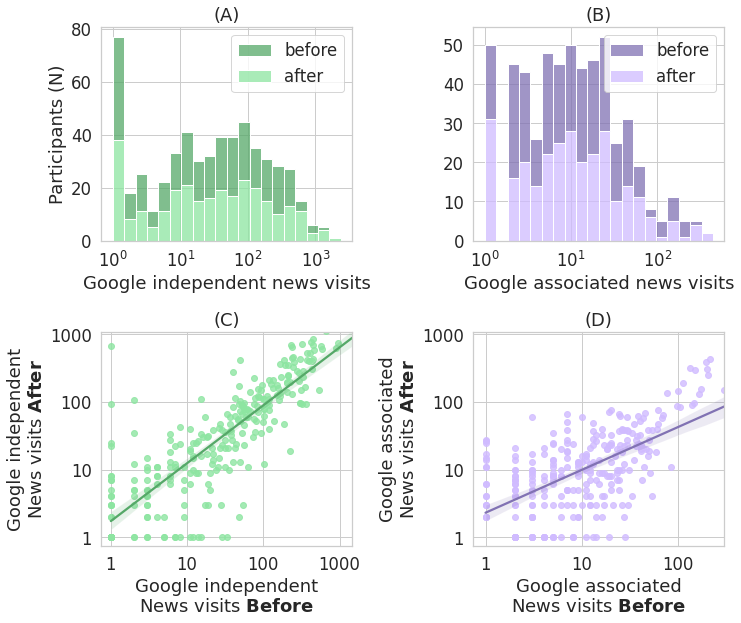

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau

sns.set(style="whitegrid", font_scale=1.5)
fig, ax = plt.subplots(2,2, figsize=(10.5,9))


##########################################################
# Plot A: Distribution of Google independent news visits #
#########################################################

# add 1 to avoid indefinitions due to the log scale
toplot = news_visits_per_participant_D_bf_aft.copy()
toplot['Freq'] = toplot['Freq'] + 1

# display the histogram with a logarithmic scale
hp = sns.histplot(
    data=toplot,
    x="Freq", 
    hue='when', 
    bins = 20,  
    multiple="stack", 
    log_scale=True,               
    palette=[sns.color_palette()[2], sns.color_palette('pastel')[2]], 
    hue_order=['before', 'after'], 
    ax=ax[0][0]
)

# add labels and titles
hp.get_legend().set_title('')
hp.set_xlabel('Google independent news visits')
hp.set_ylabel('Participants (N)')
hp.set_title('(A)')

#####################################################
# Plot B: Distribution of Google driven news visits #
#########################################################

# add 1 to avoid indefinitions due to the log scale
toplot = news_visits_per_participant_C_bf_aft.copy()
toplot['Freq'] = toplot['Freq'] + 1

# display the histogram with a logarithmic scale
hp = sns.histplot(
    data=toplot,
    x="Freq",
    hue='when',
    bins = 20,
    multiple="stack",
    log_scale=True,
    hue_order=['before', 'after'],
    palette=[sns.color_palette()[4], sns.color_palette('pastel')[4]], 
    ax=ax[0][1]
)

# add labels and titles
hp.get_legend().set_title('')
hp.set_xlabel('Google associated news visits')
hp.set_ylabel('')
hp.set_title('(B)')


################################################################################
# Plot C:  Scatterplot between google independent news visits before and after #
################################################################################


# scatterplot with linear regression
rp = sns.regplot(x=np.log10(news_visits_per_participant_D_bf_aft_wide['before']+1), 
                 y=np.log10(news_visits_per_participant_D_bf_aft_wide['after']+1),  
                 color=sns.color_palette('pastel')[2],  
                 line_kws={'color': sns.color_palette()[2]},
                 ci=95, 
                 ax=ax[1][0]
                )
# set logarithmic axis so they match the x and y transformation
rp.set_xticks(np.log10(np.array([1, 10, 100, 1000, 10000])))
rp.get_xaxis().set_major_formatter(lambda x, pos: f'{10 ** x:g}')
rp.set_xlim(np.log10(np.array([.75, max(news_visits_per_participant_D_bf_aft_wide['before'])])))
rp.set_yticks(np.log10(np.array([1, 10, 100, 1000])))
rp.get_yaxis().set_major_formatter(lambda x, pos: f'{10 ** x:g}')
rp.set_ylim(np.log10(np.array([.75, 1000 + 100])))

# add labels and titles
rp.set_xlabel('Google independent\nNews visits $\\bf{Before}$')
rp.set_ylabel('Google independent\nNews visits $\\bf{After}$')
rp.set_title('(C)')


###############################################################################
# Plot D:  Scatterplot between google associated news visits before and after #
###############################################################################
# scatterplot with linear regression
rp = sns.regplot(x=np.log10(news_visits_per_participant_C_bf_aft_wide['before']+1), 
                 y=np.log10(news_visits_per_participant_C_bf_aft_wide['after']+1),  
                 color=sns.color_palette('pastel')[4],  
                 line_kws={'color': sns.color_palette()[4]},
                 ci=95, 
                 ax=ax[1][1]
                )
# set logarithmic axis so they match the x and y transformation
rp.set_xticks(np.log10(np.array([1, 10, 100, 1000, 10000])))
rp.get_xaxis().set_major_formatter(lambda x, pos: f'{10 ** x:g}')
rp.set_xlim(np.log10(np.array([.75, max(news_visits_per_participant_C_bf_aft_wide['before'])])))
rp.set_yticks(np.log10(np.array([1, 10, 100, 1000])))
rp.get_yaxis().set_major_formatter(lambda x, pos: f'{10 ** x:g}')
rp.set_ylim(np.log10(np.array([.75, 1000 + 100])))


# add labels and titles
rp.set_xlabel('Google associated\nNews visits $\\bf{Before}$')
rp.set_ylabel('Google associated\nNews visits $\\bf{After}$')
rp.set_title('(D)')


plt.tight_layout()


# Correlations of visits per participants per domain
before and after for Google associated and independent visits (Plots C and D)

In [9]:
from scipy.stats import kstest, pearsonr, spearmanr, kendalltau



print('All news:')
# Correlations for All News visits
before = news_visits_per_participant_per_domain_B_bf_aft_wide['before']
after = news_visits_per_participant_per_domain_B_bf_aft_wide['after']
print('\nComparison of distributions (Kolmogorov–Smirnov):')
print(kstest(before, after))
print('\nCorrelation in the number of visits per participants before and after in the Google independent visits:')
print('Degrees of Freedom:', len(news_visits_per_participant_per_domain_B_bf_aft_wide) - 2)
print('Spearman correlation of Google independent news visits before and after')
print(spearmanr(before, after))
print('Kendall tau correlation of Google independent news visits before and after')
print(kendalltau(before, after))
print('Pearson-r correlation of Google independent news visits before and after')
print(pearsonr(before, after))
print('-'*80)

print('Google Independent:')
# Correlations for Google Independent visits
before = news_visits_per_participant_per_domain_D_bf_aft_wide['before']
after = news_visits_per_participant_per_domain_D_bf_aft_wide['after']
print('\nComparison of distributions (Kolmogorov–Smirnov):')
print(kstest(before, after))
print('\nCorrelation in the number of visits per participants before and after in the Google independent visits:')
print('Degrees of Freedom:', len(news_visits_per_participant_per_domain_D_bf_aft_wide) - 2)
print('Spearman correlation of Google independent news visits before and after')
print(spearmanr(before, after))
print('Kendall tau correlation of Google independent news visits before and after')
print(kendalltau(before, after))
print('Pearson-r correlation of Google independent news visits before and after')
print(pearsonr(before, after))
print('-'*80)


print('\nGoogle Associated:')
# Correlations for Google associated visits
before = news_visits_per_participant_per_domain_C_bf_aft_wide['before']
after = news_visits_per_participant_per_domain_C_bf_aft_wide['after']
print('\nComparison of distributions (Kolmogorov–Smirnov):')
print(kstest(before, after))
print('\nCorrelation in the number of visits per participants before and after in the Google associated visits:')
print('Degrees of Freedom:', len(news_visits_per_participant_per_domain_C_bf_aft_wide) - 2)
print('Spearman correlation of Google associated news visits before and after')
print(spearmanr(before, after))
print('Kendall tau correlation of Google associated news visits before and after')
print(kendalltau(before, after))
print('Pearson-r correlation of Google associated news visits before and after')
print(pearsonr(before, after))
print('-'*80)

All news:

Comparison of distributions (Kolmogorov–Smirnov):
KstestResult(statistic=0.0022421524663677195, pvalue=0.9974733628678101)

Correlation in the number of visits per participants before and after in the Google independent visits:
Degrees of Freedom: 62438
Spearman correlation of Google independent news visits before and after
SpearmanrResult(correlation=0.43839255955486034, pvalue=0.0)
Kendall tau correlation of Google independent news visits before and after
KendalltauResult(correlation=0.43329245503325864, pvalue=0.0)
Pearson-r correlation of Google independent news visits before and after
(0.7887736105145304, 0.0)
--------------------------------------------------------------------------------
Google Independent:

Comparison of distributions (Kolmogorov–Smirnov):
KstestResult(statistic=0.0021941063420883866, pvalue=0.9981724814989338)

Correlation in the number of visits per participants before and after in the Google independent visits:
Degrees of Freedom: 62438
Spearman c

# Correlations of visits per participants 
before and after for Google associated and independent visits (Plots C and D)

In [8]:
from scipy.stats import kstest, pearsonr, spearmanr, kendalltau

# Correlations for Google Independent visits
before = news_visits_per_participant_D_bf_aft_wide['before']
after = news_visits_per_participant_D_bf_aft_wide['after']

print('Google Independent:')
print('\nComparison of distributions (Kolmogorov–Smirnov):')
print(kstest(before, after))
print('\nCorrelation in the number of visits per participants before and after in the Google independent visits:')
print('Degrees of Freedom:', len(news_visits_per_participant_D_bf_aft_wide) - 2)
print('Spearman correlation of Google independent news visits before and after')
print(spearmanr(before, after))
print('Kendall tau correlation of Google independent news visits before and after')
print(kendalltau(before, after))
print('Pearson-r correlation of Google independent news visits before and after')
print(pearsonr(before, after))


print('\nGoogle Associated:')
# Correlations for Google associated visits
before = news_visits_per_participant_C_bf_aft_wide['before']
after = news_visits_per_participant_C_bf_aft_wide['after']
print('\nComparison of distributions (Kolmogorov–Smirnov):')
print(kstest(before, after))
print('\nCorrelation in the number of visits per participants before and after in the Google associated visits:')
print('Degrees of Freedom:', len(news_visits_per_participant_C_bf_aft_wide) - 2)
print('Spearman correlation of Google associated news visits before and after')
print(spearmanr(before, after))
print('Kendall tau correlation of Google associated news visits before and after')
print(kendalltau(before, after))
print('Pearson-r correlation of Google associated news visits before and after')
print(pearsonr(before, after))


Google Independent:

Comparison of distributions (Kolmogorov–Smirnov):
KstestResult(statistic=0.04285714285714286, pvalue=0.9597659599959413)

Correlation in the number of visits per participants before and after in the Google independent visits:
Degrees of Freedom: 278
Spearman correlation of Google independent news visits before and after
SpearmanrResult(correlation=0.8555603003328391, pvalue=1.824650129245325e-81)
Kendall tau correlation of Google independent news visits before and after
KendalltauResult(correlation=0.6998636552475231, pvalue=3.0094329538584676e-65)
Pearson-r correlation of Google independent news visits before and after
(0.7291770451246512, 1.0430480508961423e-47)

Google Associated:

Comparison of distributions (Kolmogorov–Smirnov):
KstestResult(statistic=0.04285714285714286, pvalue=0.9597659599959413)

Correlation in the number of visits per participants before and after in the Google associated visits:
Degrees of Freedom: 278
Spearman correlation of Google assoc